In [1]:
#import libraries
import os
import matplotlib.pyplot as plt
%matplotlib inline
import astropy
from astropy.io import fits
from astropy.table import Table
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
hdul = fits.open('YMG_bonafide.fits')
hdul.info()

Filename: YMG_bonafide.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    562   11470R x 270C   [K, 24A, 13A, 6A, 2A, K, 1A, 1A, 1A, 3A, 8A, 37A, 12A, 7A, 35A, 5A, 16A, 19A, 30A, 3A, 24A, 11A, 11A, 17A, 10A, 5A, 97A, 19A, 19A, K, 9A, 10A, 9A, 11A, 6A, 65A, 22A, 29A, 76A, 17A, 320A, K, 39A, 6A, 6A, 20A, 20A, 6A, 6A, 6A, 20A, 20A, 11A, 11A, 9A, 19A, 20A, 20A, 7A, 7A, 14A, 19A, D, D, 12A, 14A, 14A, 11A, 11A, 8A, 6A, 9A, 6A, 20A, 8A, 5A, 9A, 5A, 8A, 6A, 9A, 6A, 7A, 5A, 19A, 8A, 7A, 103A, 8A, 6A, 8A, 6A, 103A, 321A, 44A, 6A, 4A, 6A, 5A, 40A, 5A, 6A, 5A, 19A, 9A, 11A, 13A, 5A, 7A, 3A, 39A, 11A, 39A, 61A, 13A, 36A, 39A, 22A, 2A, 61A, 6A, 2A, 49A, 130A, 1A, 4A, 6A, 34A, 4A, 5A, 4A, 5A, 3A, 5A, 4A, 5A, 3A, 7A, 6A, 6A, 6A, 7A, 6A, 6A, 6A, 7A, 6A, 6A, 6A, 7A, 6A, 19A, 7A, 6A, 26A, 7A, 6A, 19A, 5A, 4A, 20A, 4A, 6A, 7A, 8A, 5A, 8A, 5A, 8A, 75A, 5A, 4A, 5A, 4A, 5A, 4A, 3A, 1A, 79A, 4A, K, 10A, 10A,

In [3]:
hdu = Table.read('YMG_bonafide.fits', hdu = 1, format = 'fits') #cluster = YMG_MAIN
hdu

<Table masked=True length=11470>
  ID   Short_Name    SpT   ... espadons_rounded_teff espadons_texp
int64   bytes24    bytes13 ...        float64           float64   
----- ------------ ------- ... --------------------- -------------
    1   J0814+0253    M5 e ...                   nan           nan
    2   J0814+2336    M4 e ...                   nan           nan
    3   J0825-0029    L0.5 ...                   nan           nan
    4   J0856-1342  M8.5 γ ...                   nan           nan
    5    HIP 46535    F7 V ...                   nan           nan
    6   CD-27 6736   K6 Ve ...                   nan           nan
    7   J0939-2946    (M5) ...                   nan           nan
    8   J0940-2229  (M4.5) ...                   nan           nan
    9   CD-39 5833    K0 V ...                   nan           nan
   10 J0951-2220 A      M5 ...                   nan           nan
  ...          ...     ... ...                   ...           ...
   --   CFHT-Hy-12     ... ...                   nan           nan
   --   CFHT-Hy-13     ... ...                   nan           nan
   --   CFHT-Hy-14     ... ...                   nan           nan
   --   CFHT-Hy-15     ... ...                   nan           nan
   --   CFHT-Hy-16      M7 ...                   nan           nan
   --   CFHT-Hy-17     ... ...                   nan           nan
   --   CFHT-Hy-18     ... ...                   nan           nan
   --   CFHT-Hy-19      M8 ...                   nan           nan
   --   CFHT-Hy-20      T2 ...                   nan           nan
   --   CFHT-Hy-21      T1 ...                   nan           nan

In [4]:
#(np.unique(hdu['YMG_MAIN'])) #BPMG, TWA, EPSC, ETAC

In [5]:
a = np.where(hdu['YMG_MAIN'] == 'BPMG')[0]
b = np.where(hdu['YMG_MAIN'] == 'TWA')[0]
c = np.where(hdu['YMG_MAIN'] == 'ESPC')[0]
d = np.where(hdu['YMG_MAIN'] == 'ETAC')[0]
tot = np.append(np.append(np.append(a,b),c),d)
papes = hdu['Discovery_Ref'][tot]
print(np.unique(papes[np.where(papes!='N/A')]))

    Discovery_Ref    
---------------------
2010AJ....140.1486L
  1982mcts.book.....H
  2002ApJ...575..484G
  2003AJ....126.2421C
  2006AJ....132..866R
 2006AJ....132..866R?
  2007ApJ...669L..97L
  2008AJ....136.1290R
  2010ApJ...714...45L
  2010Sci...329...57L
                  ...
  2015ApJ...798...73G
  2015ApJS..219...33G
  2015Sci...350...64M
  2016ApJ...821L..15K
  2016ApJ...822L...1S
  2016arXiv161003867R
  2017ApJS..228...18G
          Chauvin2004
       Gagné in prep.
      Kirkpatrick2008
              Liu2013
Length = 25 rows


In [6]:
f= open("papers.txt","w+")
for i in range(np.size(np.unique(papes[np.where(papes!='N/A')]))):
    f.write(np.unique(papes[np.where(papes!='N/A')])[i] + '\n')
    
f.close()

In [7]:
hdu = hdu[tot] #get only the clusters of interest

In [8]:
clean = (hdu[hdu['GAIADR2_ID'] != '...']['GAIADR2_ID'])
stri = ""
for id in clean:
    stri += "dr2.source_id=" + id + " OR "
stri = stri[:-4] #get rid of last OR

In [9]:
#https://www.aanda.org/articles/aa/pdf/forth/aa39657-20.pdf

query = """
SELECT dr2.source_id, edr3.*
FROM gaiadr2.gaia_source AS dr2
JOIN gaiaedr3.dr2_neighbourhood AS edr3
ON dr2.source_id=edr3.dr2_source_id
WHERE """ + stri + """ORDER BY edr3.dr3_source_id"""#get objects dr3 ids
filename ='crossmatch.dat'
if not os.path.isfile(filename):
    Gaia.launch_job_async(query, output_file=filename,
                          dump_to_file=True, verbose=True) #gen a file if it does not already exist
results = Table.read(filename) #read in file

In [10]:
from collections import Counter
dups = [item for item, count in Counter(results['source_id']).items() if count > 1] #get duplicate ids

In [11]:
delete = np.zeros(0) #delete duplicates with higher angular distance differences
for item in dups:
    index = np.where(results['source_id']==item)
    keepi = np.where((results['angular_distance']==np.min(results['angular_distance'][index])))
    indices = np.delete(index,np.where(results['angular_distance'][keepi] == results['angular_distance'][index]))
    delete = np.append(delete,indices)

In [12]:
crossmatch = results.to_pandas().drop(delete)
crossmatch

source_id        dr2_source_id        dr3_source_id  \
0       6989977670532096     6989977670532096     6989977670532096   
1      18211043587721088    18211043587721088    18211043587721088   
2      22338438439701760    22338438439701760    22338438439701760   
3      22338644598132096    22338644598132096    22338644598132096   
4      33502913868094080    33502913868094080    33502913868094080   
..                   ...                  ...                  ...   
623  6854064945906527104  6854064945906527104  6854064945906527104   
624  6882838031331951488  6882838031331951488  6882838031333427456   
625  6882840883190250752  6882840883190250752  6882840883188886784   
626  6885822307751773568  6885822307751773568  6885822307751773568   
627  6896466851620582400  6896466851620582400  6896466851620582400   

     angular_distance  magnitude_difference  proper_motion_propagation  
0            0.038196             -0.019819                       True  
1            0.022406             -0.010415                       True  
2            0.055079             -0.022018                       True  
3            0.875726              0.026347                       True  
4            0.182330             -0.030502                       True  
..                ...                   ...                        ...  
623          0.172337             -0.000066                       True  
624          0.191307              0.006623                       True  
625          0.281714              0.006408                       True  
626          0.246497              0.023934                       True  
627          1.267027             -0.034658                       True  

[565 rows x 6 columns]

In [98]:
dups = [item for item, count in Counter(results['source_id']).items() if count > 1] #get duplicate ids
#check for no duplicates

In [14]:
stri = ""
for id in results['dr3_source_id']:
    stri += "source_id=" + str(id) + " OR "
stri = stri[:-4] #get rid of last OR

In [53]:
query = """
    SELECT source_id, RUWE, phot_bp_rp_excess_factor, bp_rp, phot_rp_mean_mag, phot_g_mean_mag
    FROM gaiaedr3.gaia_source
    WHERE """ + stri #get objects near cluster, i chose to get a few extra parameters since I was interested in looking at them independently
filename ='dr3.dat'
if not os.path.isfile(filename):
    Gaia.launch_job_async(query, output_file=filename,
        dump_to_file=True, verbose=True) #gen a file if it does not already exist
dr3 = Table.read(filename) #read in file

In [54]:
dr3 = dr3.to_pandas()

In [55]:
dr3

source_id      ruwe  phot_bp_rp_excess_factor     bp_rp  \
0    6129199845030851840  1.133376                  1.550676  3.381756   
1    6154072584751868672  1.675093                  1.551528  3.092854   
2    6152460249733810688  1.093867                  1.807544  3.455078   
3    6150861598484393856  1.006914                  1.335258  1.940764   
4    6151049133934677248  0.885123                  1.219269  1.058161   
..                   ...       ...                       ...       ...   
560  1807632781474766080  0.939360                  1.346504  2.108430   
561  4482593565100321664  1.240707                  1.506517  3.088020   
562  6882838031333427456  0.973140                  1.302996  1.612653   
563  6882840883188886784  1.032923                  1.214879  0.718936   
564  4074418633718341248  2.987881                  1.504634  2.879216   

     phot_rp_mean_mag  phot_g_mean_mag  
0           13.796631        15.132388  
1           14.763323        16.076412  
2           17.982027        19.489252  
3            9.517806        10.496087  
4            9.297937         9.908868  
..                ...              ...  
560          9.783933        10.806663  
561         12.204395        13.485081  
562          9.042175         9.911375  
563          6.670985         7.131465  
564         13.760688        15.019239  

[565 rows x 6 columns]

In [43]:
cluster = pd.DataFrame({'dr2_source_id': hdu['GAIADR2_ID'], 'cluster_name': hdu['YMG_MAIN']})
cluster = cluster.replace(b'...',None)
cluster = pd.DataFrame({'dr2_source_id': cluster['dr2_source_id'].astype(np.int64), 'cluster_name': cluster['cluster_name']})

5355751581627180288


In [48]:
merge = cluster.merge(crossmatch, on = 'dr2_source_id')
merge = merge.drop(['source_id','angular_distance','magnitude_difference','proper_motion_propagation'],axis=1)
merge

dr2_source_id cluster_name        dr3_source_id
0    5355751581627180288      b'BPMG'  5355751581627180288
1    5355751581627180288      b'BPMG'  5355751581627180288
2    2337191189529102336      b'BPMG'  2337191189529102336
3    2337191189529102336      b'BPMG'  2337191189529102336
4    2477870708709917568      b'BPMG'  2477870708709917568
..                   ...          ...                  ...
598  5209009149172296960      b'ETAC'  5209009149172296960
599  5208993000095283968      b'ETAC'  5208993000095283968
600  5209024366240981632      b'ETAC'  5209024366240981632
601  5209039110864333312      b'ETAC'  5209039110864333312
602  5209140815689766144      b'ETAC'  5209140815689766144

[603 rows x 3 columns]

In [77]:
final = merge.merge(dr3,left_on = ['dr3_source_id'],right_on = ['source_id'])
final = final.drop(['source_id'], axis=1)
final = final[final['ruwe'] < 1.2]
final = final.reset_index()
final

index        dr2_source_id cluster_name        dr3_source_id      ruwe  \
0        2  2337191189529102336      b'BPMG'  2337191189529102336  0.932980   
1        3  2337191189529102336      b'BPMG'  2337191189529102336  0.932980   
2        5   107774198474602368      b'BPMG'   107774198474602368  0.919168   
3        6   107774202769886848      b'BPMG'   107774202769886848  1.008345   
4        8  2517397846786452224      b'BPMG'  2517397846786452224  1.127892   
..     ...                  ...          ...                  ...       ...   
303    594  5209135352491538432      b'ETAC'  5209135352491538432  1.026999   
304    595  5209023133585929984      b'ETAC'  5209023133585929984  0.923149   
305    597  5209096903943853824      b'ETAC'  5209096903943853824  0.887733   
306    601  5209039110864333312      b'ETAC'  5209039110864333312  0.998376   
307    602  5209140815689766144      b'ETAC'  5209140815689766144  1.157252   

     phot_bp_rp_excess_factor     bp_rp  phot_rp_mean_mag  phot_g_mean_mag  
0                    1.181820  0.528325          5.757536         6.094202  
1                    1.181820  0.528325          5.757536         6.094202  
2                    1.200608  0.793576          7.140438         7.622567  
3                    1.191851  0.670002          6.487691         6.904095  
4                    1.185137  0.541232          6.348134         6.694463  
..                        ...       ...               ...              ...  
303                  1.329905  1.923475         10.832892        11.802918  
304                  1.274107  1.536208          9.851660        10.674513  
305                  1.240872  1.250013         11.106276        11.807870  
306                  1.547158  3.433957         13.813678        15.150597  
307                  1.608757  3.321030         14.843998        16.215250  

[308 rows x 9 columns]

In [101]:
names = ['BPMG','TWA','EPSC','ETAC']
for clus in [b'BPMG',b'TWA',b'EPSC',b'ETAC']:
    indices = np.where(final['cluster_name'] == clus)[0]
    plt.scatter(final['bp_rp'][indices],final['phot_g_mean_mag'][indices],marker='.',label = clus + "(num stars: " + str(np.size(indices)))
    plt.gca().invert_yaxis()
    plt.xlabel(r"$B_p-R_p$")
    plt.ylabel(r"$M_G$")
    print(np.size(indices))
    print(clus)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

TypeError: can't concat str to bytes

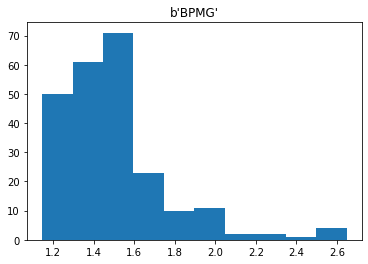

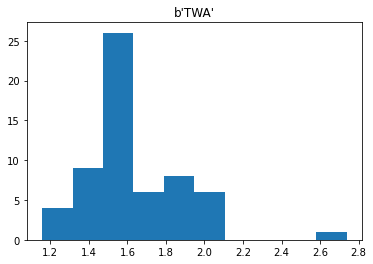

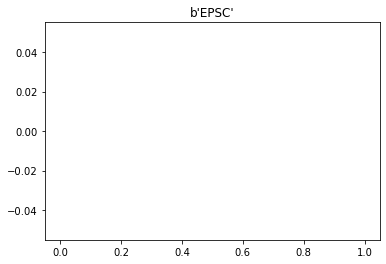

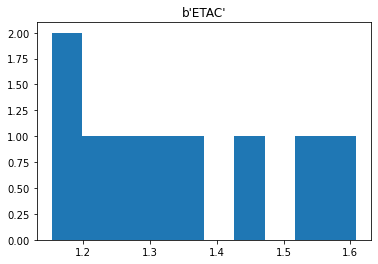

In [100]:
for clus in [b'BPMG',b'TWA',b'EPSC',b'ETAC']:
    indices = np.where(final['cluster_name'] == clus)[0]
    plt.hist(final['phot_bp_rp_excess_factor'][indices])
    plt.title(clus)
    plt.show()